In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics

from sklearn.model_selection import learning_curve

In [3]:
data = pd.read_csv('./Data/dfUnido_meli.csv')

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_13302/1290962353.py:1: DtypeWarning: Columns (19,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./Data/dfUnido_meli.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 47 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   id                                                                 19991 non-null  object 
 1   title                                                              19991 non-null  object 
 2   thumbnail_id                                                       19991 non-null  object 
 3   listing_type_id                                                    19991 non-null  object 
 4   permalink                                                          19991 non-null  object 
 5   category_id                                                        19991 non-null  object 
 6   domain_id                                                          19991 non-null  object 
 7   order_backend         

In [5]:
data.head()

,id,title,thumbnail_id,listing_type_id,permalink,category_id,domain_id,order_backend,price,sold_quantity,...,seller__seller_reputation__metrics__delayed_handling_time__value,seller__seller_reputation__metrics__cancellations__period,seller__seller_reputation__metrics__cancellations__rate,seller__seller_reputation__metrics__cancellations__value,installments__quantity,installments__amount,installments__rate,days_remaining,years_active,variation_filters
0,MLA926762551,Cámara Instantánea Fujifilm Instax Mini 11 Ice...,788648-MLA42359217261_062020,gold_special,https://www.mercadolibre.com.ar/camara-instant...,MLA1040,MLA-ANALOG_CAMERAS,1,54999.0,50,...,0,60 days,0.0000,2,6.0,13598.50,48.35,7242,15,NaN
1,MLA1205153058,Tarjeta De Memoria Sandisk Sdsqxcy-064g-gn6ma ...,665416-MLA40351780042_012020,gold_special,https://www.mercadolibre.com.ar/tarjeta-de-mem...,MLA9467,MLA-MEMORY_CARDS,2,7300.0,250,...,0,60 days,0.0000,0,6.0,1804.93,48.35,7175,0,NaN
2,MLA1124760728,Sony Cyber-shot H300 Dsc-h300 Compacta Avanza...,852025-MLA49434476863_032022,gold_special,https://www.mercadolibre.com.ar/sony-cyber-sho...,MLA1042,MLA-DIGITAL_CAMERAS,3,99999.0,50,...,190,60 days,0.0000,0,6.0,24724.75,48.35,6936,8,NaN
3,MLA1259217110,Cámara De Video Noblex Acn1 4k Negra,863981-MLA42918720182_072020,gold_special,https://www.mercadolibre.com.ar/camara-de-vide...,MLA392132,MLA-VIDEO_CAMERAS,4,19999.0,150,...,617,60 days,0.0085,242,6.0,4944.75,48.35,7211,5,NaN
4,MLA673528318,Ocular Dk-25 Para Nikon D5500 D5300 D5200 D330...,773832-MLA31016831796_062019,gold_special,https://articulo.mercadolibre.com.ar/MLA-67352...,MLA70304,MLA-PHOTOGRAPHY_ACCESSORIES_AND_SPARE_PARTS,5,899.0,200,...,0,60 days,0.0000,0,6.0,222.28,48.35,5244,20,NaN


In [6]:
data['category_id'].unique()

array(['MLA1040', 'MLA9467', 'MLA1042', 'MLA392132', 'MLA70304',
       'MLA430383', 'MLA17966', 'MLA69879', 'MLA62527', 'MLA412362',
       'MLA414219', 'MLA36496', 'MLA2893', 'MLA32230', 'MLA38192',
       'MLA58727', 'MLA38188', 'MLA412431', 'MLA10477', 'MLA3553',
       'MLA38270', 'MLA62528', 'MLA413549', 'MLA413974', 'MLA17967',
       'MLA50086', 'MLA417788', 'MLA414102', 'MLA5649', 'MLA1045',
       'MLA416685', 'MLA4235', 'MLA1634', 'MLA413541', 'MLA4707',
       'MLA412529', 'MLA410298', 'MLA415448', 'MLA413487', 'MLA414101',
       'MLA38267', 'MLA38193', 'MLA38191', 'MLA50089', 'MLA69938',
       'MLA3544', 'MLA430588', 'MLA430342', 'MLA69931', 'MLA411870',
       'MLA411998', 'MLA430992', 'MLA38190', 'MLA10468', 'MLA1914',
       'MLA414212', 'MLA17684', 'MLA4702', 'MLA413563', 'MLA430379',
       'MLA73569', 'MLA70289', 'MLA65235', 'MLA70303', 'MLA416791',
       'MLA50088', 'MLA416987', 'MLA420012', 'MLA413445', 'MLA416684',
       'MLA414123', 'MLA430375', 'MLA430364', 

In [8]:
data['seller__seller_reputation__level_id'].unique()

array(['5_green', '4_light_green', '3_yellow', '2_orange', nan, '1_red'],
      dtype=object)

In [9]:
data['tags'].unique()

array(["['extended_warranty_eligible', 'good_quality_picture', 'good_quality_thumbnail', 'immediate_payment', 'cart_eligible']",
       "['extended_warranty_eligible', 'good_quality_picture', 'good_quality_thumbnail', 'immediate_payment', 'cart_eligible', 'best_seller_candidate', 'shipping_guaranteed']",
       "['brand_verified', 'good_quality_picture', 'good_quality_thumbnail', 'immediate_payment', 'cart_eligible', 'shipping_guaranteed']",
       ...,
       "['brand_verified', 'dragged_bids_and_visits', 'extended_warranty_eligible', 'good_quality_picture', 'good_quality_thumbnail', 'ahora-paid-by-buyer', 'immediate_payment', 'shipping_guaranteed']",
       "['good_quality_thumbnail', 'loyalty_discount_eligible', 'extended_warranty_eligible', 'good_quality_picture', 'immediate_payment']",
       "['loyalty_discount_eligible', 'ahora-paid-by-buyer', 'brand_verified', 'extended_warranty_eligible', 'good_quality_picture', 'good_quality_thumbnail', 'immediate_payment', 'shipping_guarante

In [10]:
import matplotlib.pyplot as plt

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_13302/1374074867.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax=plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


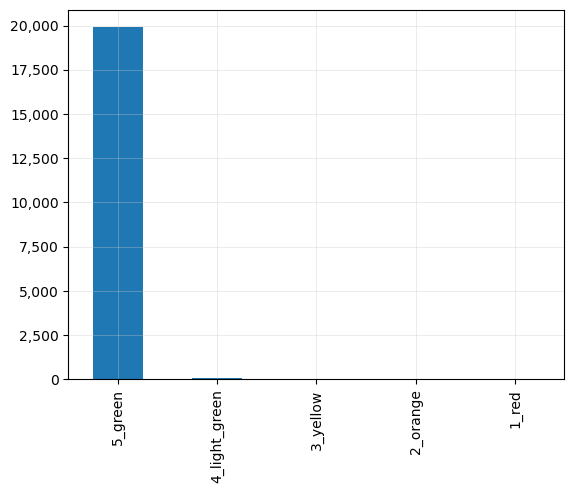

In [14]:
ax=data['seller__seller_reputation__level_id'].value_counts().plot(kind = 'bar')
ax=plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
ax=plt.grid(color='#c7c7c7', linewidth=0.5, axis='both', alpha=0.5)

[(0.0, 120000.0)]

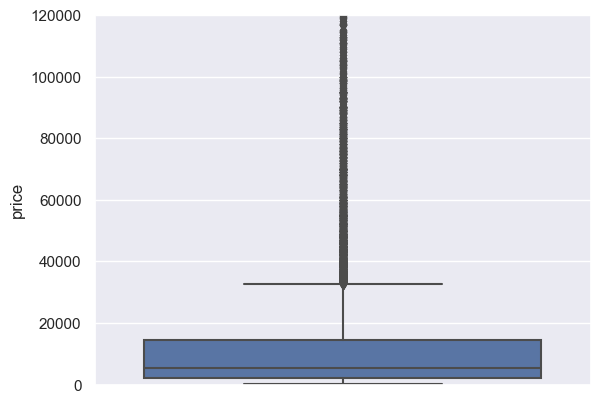

In [23]:
sns.set(rc={"figure.dpi":100})
g=sns.boxplot(data=data, y=data['price'])
#g.set(title='Operaciones monetarias por cluster')
g.set (ylim=(0,120000))
#g.set(xlabel='Cluster', ylabel='operaciones_monetarias')

/var/folders/ms/v5w4mc3d0nscpg3rdtjqm5200000gp/T/ipykernel_13302/2830784572.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax=plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])


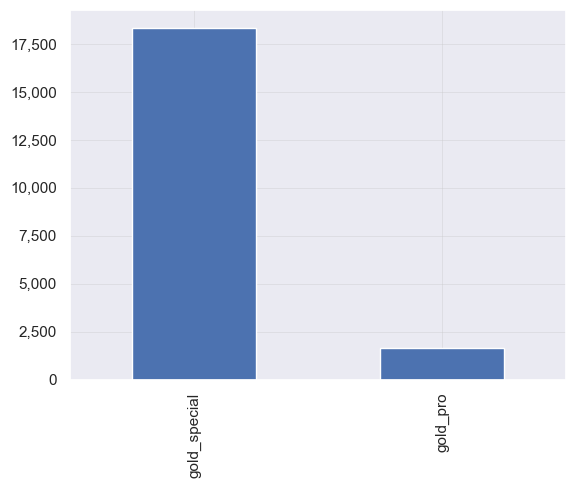

In [24]:
ax=data['listing_type_id'].value_counts().plot(kind = 'bar')
ax=plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
ax=plt.grid(color='#c7c7c7', linewidth=0.5, axis='both', alpha=0.5)